In [1]:
import numpy as np
from clustering_easy_k_optimisation import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m=1000
n=2

## Generate data

In [3]:
offset = np.zeros((m,n))
x_shift = np.random.choice([0,4], (m,))
offset[:,0] = x_shift
data = np.random.randn(m,n) + offset

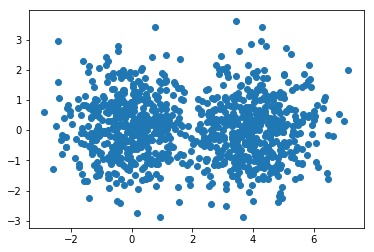

In [4]:
plt.scatter(data[:,0],data[:,1])

## Clustering

In [5]:
class_dict, vol_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 3
k=3: Stopped clustering after iteration 13
k=4: Stopped clustering after iteration 25
k=5: Stopped clustering after iteration 37
k=6: Warning: class dropped out
k=7: Warning: class dropped out
k=8: Warning: class dropped out
k=9: Warning: class dropped out


In [6]:
vol_dict

{'k=1': 95.5541901623136,
 'k=2': 85.85711930569147,
 'k=3': 119.85394948585278,
 'k=4': 114.65491097772355,
 'k=5': 113.01966526617662,
 'k=6': None,
 'k=7': None,
 'k=8': None,
 'k=9': None}

The <code>k</code> with the smallest volume should be the best one.

## Visualise results

Text(0.5,1,'k=1')

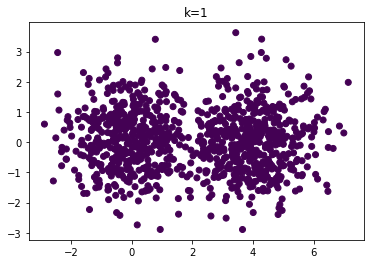

In [7]:
key='k=1'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5,1,'k=2')

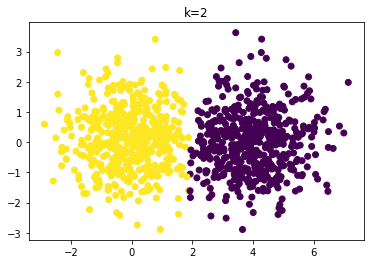

In [8]:
key='k=2'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5,1,'k=3')

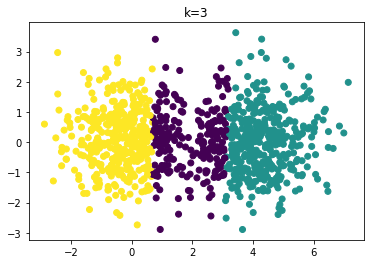

In [9]:
key='k=3'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5,1,'k=4')

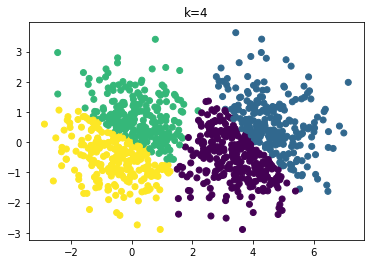

In [10]:
key='k=4'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5,1,'k=5')

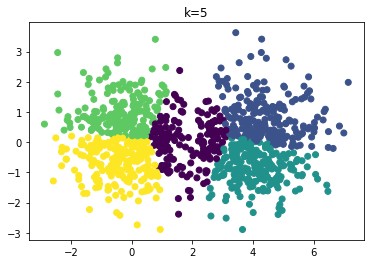

In [11]:
key='k=5'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

## Conclusion

## Other experiments